# DS 7333 - Quantifying the World
## Case Study #6: "Searching for Exotic Particles in High-Energy Physics with Deep Learning"¶

Sterling Beason, Sean Kennedy, Emil Ramos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
from IPython.display import display
# modeling
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
# sklearn helpers
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
print(tf.__version__)

2.3.0


### Import Data (subset)

In [3]:
# import data
nrows = 1000000
data = pd.read_csv("./data/HIGGS.csv", nrows=nrows, header=None)
data[0] = data[0].astype(int)
print(f"Using {nrows} rows of entire dataset")

Using 1000000 rows of entire dataset


In [4]:
def do_model(name, features, labels):
    display(md(f"### {name}"))
    
    # Partition data
    display(md("#### Partition Data"))
    X = features
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7333)
    print("done.")
    
    # Build model
    display(md("#### Build Model"))
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(300, activation='tanh'),
        tf.keras.layers.Dense(300, activation='tanh'),
        tf.keras.layers.Dense(300, activation='tanh'),
        tf.keras.layers.Dense(300, activation='tanh'),
        tf.keras.layers.Dense(300, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(
        optimizer='sgd',
        loss='mse',
        metrics=['accuracy']
    )
    print("done.")
    
    # early stopping callback
    es = EarlyStopping(monitor = "accuracy", min_delta = 0.01, patience = 4)
    
    display(md("#### Train Model"))
    # fit
    history = model.fit(
        X_train, 
        y_train, 
        validation_data=(X_test, y_test), 
        callbacks=[es],
        epochs=200, 
        batch_size=100
    )
    
    display(md("#### Train/Loss Plot (MSE)"))
    plt.plot(history.history['loss'], color='blue')
    plt.plot(history.history['val_loss'], color='orange')
    plt.ylabel('Loss (Blue: Train, Orange: Val.)')
    plt.xlabel('Epochs')
    plt.title('Training/Validation Curves')
    plt.show()
    
    # accuracy
    model_scores = model.evaluate(X_test, y_test, verbose=0)
    
    # AUC
    predictions = model.predict(X_test).ravel() # predictions
    fpr, tpr, thresholds = roc_curve(y_test, predictions) # ROC
    auc_metric = auc(fpr, tpr) # finally AUC
    
    # print metrics
    display(md("#### Evaluate Model - Metrics"))
    print('Accuracy:', model_scores[1])
    print(f"AUC: {auc_metric}")
    
    display(md(f"### ----------------------------------"))
    
    return (model_scores[1], auc_metric)

### Build/Evaluate Models

### Low-level

#### Partition Data

done.


#### Build Model

done.


#### Train Model

Epoch 1/200
8000/8000 [==============================] - 29s 4ms/step - loss: 0.2380 - accuracy: 0.5866 - val_loss: 0.2327 - val_accuracy: 0.6052
Epoch 2/200
8000/8000 [==============================] - 29s 4ms/step - loss: 0.2306 - accuracy: 0.6120 - val_loss: 0.2293 - val_accuracy: 0.6156
Epoch 3/200
8000/8000 [==============================] - 29s 4ms/step - loss: 0.2270 - accuracy: 0.6234 - val_loss: 0.2248 - val_accuracy: 0.6302
Epoch 4/200
8000/8000 [==============================] - 29s 4ms/step - loss: 0.2238 - accuracy: 0.6321 - val_loss: 0.2233 - val_accuracy: 0.6343
Epoch 5/200
8000/8000 [==============================] - 28s 4ms/step - loss: 0.2209 - accuracy: 0.6404 - val_loss: 0.2192 - val_accuracy: 0.6443
Epoch 6/200
8000/8000 [==============================] - 28s 4ms/step - loss: 0.2187 - accuracy: 0.6462 - val_loss: 0.2178 - val_accuracy: 0.6478
Epoch 7/200
8000/8000 [==============================] - 29s 4ms/step - loss: 0.2169 - accuracy: 0.6508 - val_loss: 0.2178 -

#### Train/Loss Plot (MSE)

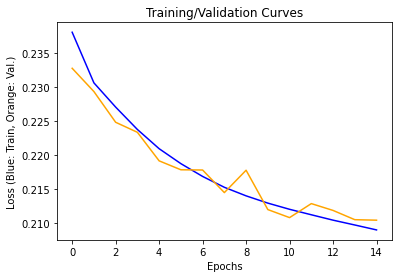

#### Evaluate Model - Metrics

Accuracy: 0.6668199896812439
AUC: 0.727275459359526


### ----------------------------------

### High-level

#### Partition Data

done.


#### Build Model

done.


#### Train Model

Epoch 1/200
8000/8000 [==============================] - 31s 4ms/step - loss: 0.2323 - accuracy: 0.6196 - val_loss: 0.2230 - val_accuracy: 0.6356
Epoch 2/200
8000/8000 [==============================] - 30s 4ms/step - loss: 0.2197 - accuracy: 0.6460 - val_loss: 0.2154 - val_accuracy: 0.6532
Epoch 3/200
8000/8000 [==============================] - 29s 4ms/step - loss: 0.2141 - accuracy: 0.6568 - val_loss: 0.2125 - val_accuracy: 0.6650
Epoch 4/200
8000/8000 [==============================] - 26s 3ms/step - loss: 0.2101 - accuracy: 0.6648 - val_loss: 0.2095 - val_accuracy: 0.6683
Epoch 5/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.2074 - accuracy: 0.6699 - val_loss: 0.2084 - val_accuracy: 0.6722
Epoch 6/200
8000/8000 [==============================] - 26s 3ms/step - loss: 0.2051 - accuracy: 0.6746 - val_loss: 0.2043 - val_accuracy: 0.6795
Epoch 7/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.2026 - accuracy: 0.6805 - val_loss: 0.2020 -

#### Train/Loss Plot (MSE)

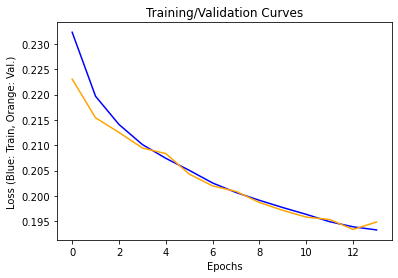

#### Evaluate Model - Metrics

Accuracy: 0.6961749792098999
AUC: 0.7703684919750498


### ----------------------------------

### Mix (Low+High)

#### Partition Data

done.


#### Build Model

done.


#### Train Model

Epoch 1/200
8000/8000 [==============================] - 26s 3ms/step - loss: 0.2254 - accuracy: 0.6314 - val_loss: 0.2195 - val_accuracy: 0.6508
Epoch 2/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.2168 - accuracy: 0.6547 - val_loss: 0.2110 - val_accuracy: 0.6724
Epoch 3/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.2083 - accuracy: 0.6736 - val_loss: 0.2047 - val_accuracy: 0.6806
Epoch 4/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.2042 - accuracy: 0.6821 - val_loss: 0.2016 - val_accuracy: 0.6881
Epoch 5/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.2005 - accuracy: 0.6887 - val_loss: 0.2011 - val_accuracy: 0.6908
Epoch 6/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.1975 - accuracy: 0.6953 - val_loss: 0.1968 - val_accuracy: 0.6974
Epoch 7/200
8000/8000 [==============================] - 25s 3ms/step - loss: 0.1945 - accuracy: 0.7013 - val_loss: 0.1932 -

#### Train/Loss Plot (MSE)

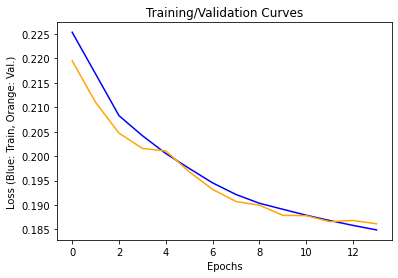

#### Evaluate Model - Metrics

Accuracy: 0.7188199758529663
AUC: 0.7951076746338199


### ----------------------------------

In [5]:
%matplotlib inline

compare_dict = {}

compare_dict["Low-level"] = do_model("Low-level", data.iloc[:,range(1,22)].values, data[0].values)
compare_dict["High-level"] = do_model("High-level", data.iloc[:,range(22,29)].values, data[0].values)
compare_dict["Mix-Low+High"] = do_model("Mix (Low+High)", data.iloc[:,range(1,29)].values, data[0].values)

### Model Comparison

"model name": (Accuracy, AUC)

In [6]:
compare_dict

{'Low-level': (0.6668199896812439, 0.727275459359526),
 'High-level': (0.6961749792098999, 0.7703684919750498),
 'Mix-Low+High': (0.7188199758529663, 0.7951076746338199)}